In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import re
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_enron.csv')
print(df.head())

   Unnamed: 0                      file  \
0           1    allen-p/_sent_mail/10.   
1           2   allen-p/_sent_mail/100.   
2           4  allen-p/_sent_mail/1001.   
3           5  allen-p/_sent_mail/1002.   
4           7  allen-p/_sent_mail/1004.   

                                             message                 date  \
0  Message-ID: <15464986.1075855378456.JavaMail.e...  04-05-2001 13:51:00   
1  Message-ID: <24216240.1075855687451.JavaMail.e...  18-10-2000 03:00:00   
2  Message-ID: <30922949.1075863688243.JavaMail.e...  31-08-2000 05:07:00   
3  Message-ID: <30965995.1075863688265.JavaMail.e...  31-08-2000 04:17:00   
4  Message-ID: <17189699.1075863688308.JavaMail.e...  14-07-2000 06:59:00   

                        subject    X-Folder           X-From  \
0                           Re:  'sent mail  Phillip K Allen   
1                      Re: test  'sent mail  Phillip K Allen   
2                     Re: Hello  'sent mail  Phillip K Allen   
3                     

In [3]:
employees = df['employee'].unique()

In [4]:
emailDict = {} #this creates a dictionary of employees, and the amount of emails tied to them in the dataset
for i in range(len(employees)):
    employeeRecord = df.loc[df['employee'] == employees[i]]
    employeeEmail = list(employeeRecord['body'])
    print(str(employees[i]), len(employeeEmail))
    emailDict[employees[i]] = employeeEmail

allen-p 2172
arnold-j 3827
arora-h 626
badeer-r 817
bailey-s 469
bass-e 7203
baughman-d 2652
beck-s 11570
benson-r 737
blair-l 2285
brawner-s 1001
buy-r 2357
campbell-l 6184
carson-m 1295
cash-m 2893
causholli-m 903
corman-s 1893
crandell-s 504
cuilla-m 950
dasovich-j 26475
davis-d 2093
dean-c 2362
delainey-d 3354
derrick-j 1608
dickson-s 384
donoho-l 1022
donohoe-t 967
dorland-c 1712
ermis-f 1211
farmer-d 12850
fischer-m 1482
forney-j 703
fossum-d 4558
gang-l 571
gay-r 1360
geaccone-t 1542
germany-c 11956
gilbertsmith-d 550
giron-d 4112
griffith-j 2758
grigsby-m 2188
guzman-m 5945
haedicke-m 4880
hain-m 3627
harris-s 530
hayslett-r 2322
heard-m 1608
hendrickson-s 714
hernandez-j 3141
hodge-j 1618
holst-k 454
horton-s 2443
hyatt-k 1672
hyvl-d 3180
jones-t 19742
kaminski-v 27326
kean-s 23561
keavey-p 2077
keiser-k 1074
king-j 448
kitchen-l 5177
kuykendall-t 1016
lavorato-j 3597
lay-k 5717
lenhart-m 5167
lewis-a 2134
linder-e 2796
lokay-m 5401
lokey-t 1124
love-p 4867
lucci-p 936
maggi-m

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [6]:
#emailScore1 = sid.polarity_scores(emailDict['gay-r'][1])
#print(emailScore1)

In [7]:
#POI - Kenneth Lay, Jefferey Skiling, Andrew Fastow, Stephen F. Cooper, Rebecca Mark-Jusbache

In [8]:
#lay-k

lk_employeeRecord = df.loc[df['employee'] == 'lay-k']
lkEmail = list(lk_employeeRecord['body'])
lkDate = sorted(list(lk_employeeRecord['date']))
lkFormatDates = [pd.to_datetime(d) for d in lkDate]
lkCompound = []
for email in lkEmail:
    lkSent = sid.polarity_scores(email)
    lkEmailComp = lkSent['compound']
    lkCompound.append(lkEmailComp)


In [9]:
#skilling-j

sj_employeeRecord = df.loc[df['employee'] == 'skilling-j']
sjEmail = list(sj_employeeRecord['body'])
sjDate = sorted(list(sj_employeeRecord['date']))
sjFormatDates = [pd.to_datetime(d) for d in sjDate]
sjCompound = []
for email in sjEmail:
    sjSent = sid.polarity_scores(email)
    sjEmailComp = sjSent['compound']
    sjCompound.append(sjEmailComp)

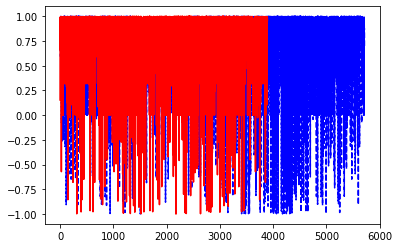

In [10]:
import matplotlib.pyplot as plt
plt.plot(lkCompound,'b--')
plt.plot(sjCompound,'r')
plt.show()

In [11]:
sjdata = []
for i in range(len(sjEmail)):
    row = [sjEmail[i],sjCompound[i]]
    sjdata.append(row)
sj = pd.DataFrame(sjdata, columns= ['email','sentiment'])
sj.head()

,email,sentiment
0,"Jana, would you please add me to your cc: list...",0.1531
1,"Dear Mr. Schaeffer,\n\nApologies for the delay...",0.9909
2,"Patti,\n\nIt was good to see you and Mike last...",0.9796
3,"They don't have to be with the others, so this...",0.9584
4,"Greg, if there are two more tickets available ...",0.6597


In [12]:
nltk.download('stopwords')
stop = stopwords.words('english')

def remove_punctuation(text):
  import string
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)
def remove_stopwords(text):
  text = [word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(text)
sj['email'] = sj['email'].apply(remove_punctuation).apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
tfidf_vectorizer = TfidfVectorizer(input='english') 
tfidf_vectorizer.fit(sj['email'])
dictionary = tfidf_vectorizer.vocabulary_.items()

C:\Users\rob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=english as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [14]:
vocab = []
count = []
for key, value in dictionary:
     vocab.append(key)
     count.append(value)
    
vocab_bef_stem = pd.Series(count, index=vocab)
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [15]:
lkdata = []
for i in range(len(lkEmail)):
    row = [lkEmail[i],lkCompound[i]]
    lkdata.append(row)
lk = pd.DataFrame(lkdata, columns= ['email','sentiment'])
lk.head()

lk['email'] = lk['email'].apply(remove_punctuation).apply(remove_stopwords)

tfidf_vectorizer.fit(lk['email'])
dictionary2 = tfidf_vectorizer.vocabulary_.items()

In [16]:

vocab1 = []
count1 = []
for key, value in dictionary2:
     vocab1.append(key)
     count1.append(value)
    
vocab_bef_stem2 = pd.Series(count, index=vocab)
vocab_bef_stem2 = vocab_bef_stem.sort_values(ascending=False)

In [17]:
top_vocab = vocab_bef_stem.head(n=10)
top_vocab.plot(kind='barh')

TypeError: no numeric data to plot